# Telecommunications Lecture 10 (11/13/2018) 

**PSTN (Public Switching Telephone Networks)**

* **PSTN (Public Switching Telephone Networks) came to fruition as a result of the divestiture of Bell Labs (ATT), which at the time had a monopoly on the telephone industry. After the divestiture of Bell Labs many companies entered the telephone industry, the result of which is the Public Switching Telephone Network (PTSN).


**Properties: PSTN (Public Switching Telephone Networks)**

* **New Switching methods (through the use of *interoffice and tandem trunks*) were use to handle the increase in size and complexity of a PSTN.**
    $$\space$$
    * Tandem Trunks: In areas experiencing high traffic Tandem Trunks minimize the number of trunks a call must be routed through to reach its destination.
    $$\space$$
    * Toll Trunks: Outside of local areas you have toll trunks that connect the central office to the toll offices, which are connected to intertoll trunks (intertoll offices) for long distance calls. 

In [46]:
from IPython.display import Image as i
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import math as m

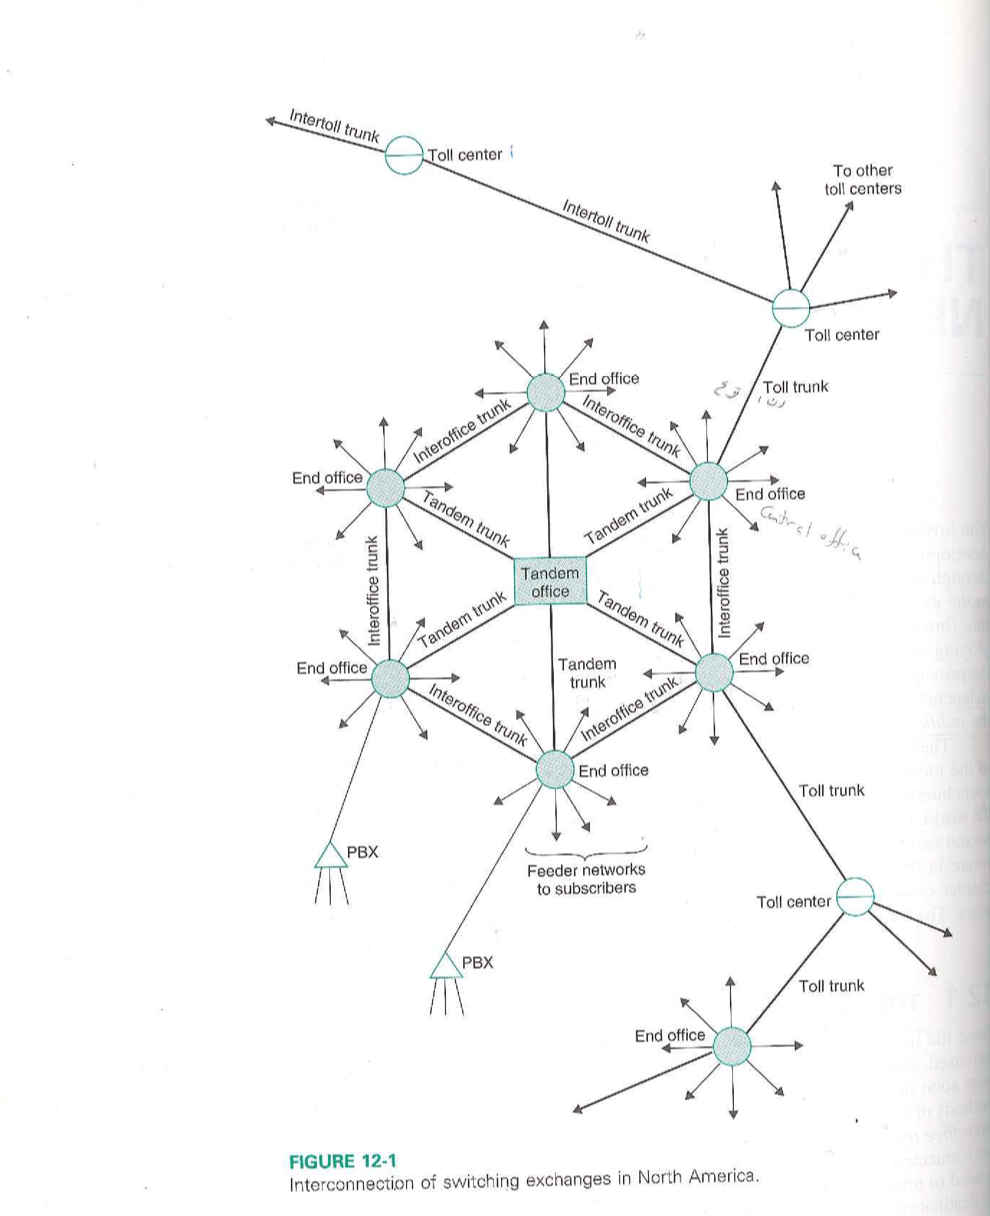

In [9]:
i(filename= "/Users/Chris/Desktop/Images/TCET34.png", width= 500, height= 500)

**Switching Hierarchy North America**

* North America has a hiercharchy for telephone offices depending on the function of the office. *"The hierchary of switching exchanges evolved in America to accomodate the demand for long distance calling."*


* The PSTN has classified these exchanges into 5 levels of switching. Shown below: 


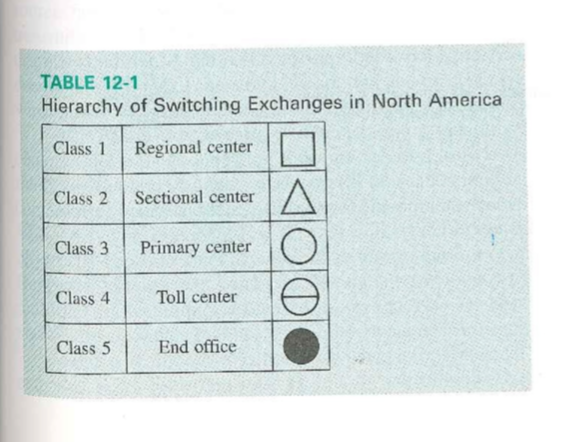

In [3]:
i(filename= "/Users/Chris/Desktop/Images/TCET36.png", width= 500, height= 500)

* **Starting from the bottom:**
    $$\space$$
    * **Level 5: End Office** is the central office in the telephone network. Central offices take care of the local area; there may be more than one depending on the local area size. 
    * **Level 4: Toll Centers** handle calls that are outside the local area.
    * **Levels 3, 2, 1: Primary, Sectional, Regional Centers** assist the **PSTN** with the volume of calls it receives.
    
    
* **The shortest route is always the best route, however, it may not always be available so the next best route is taken.**

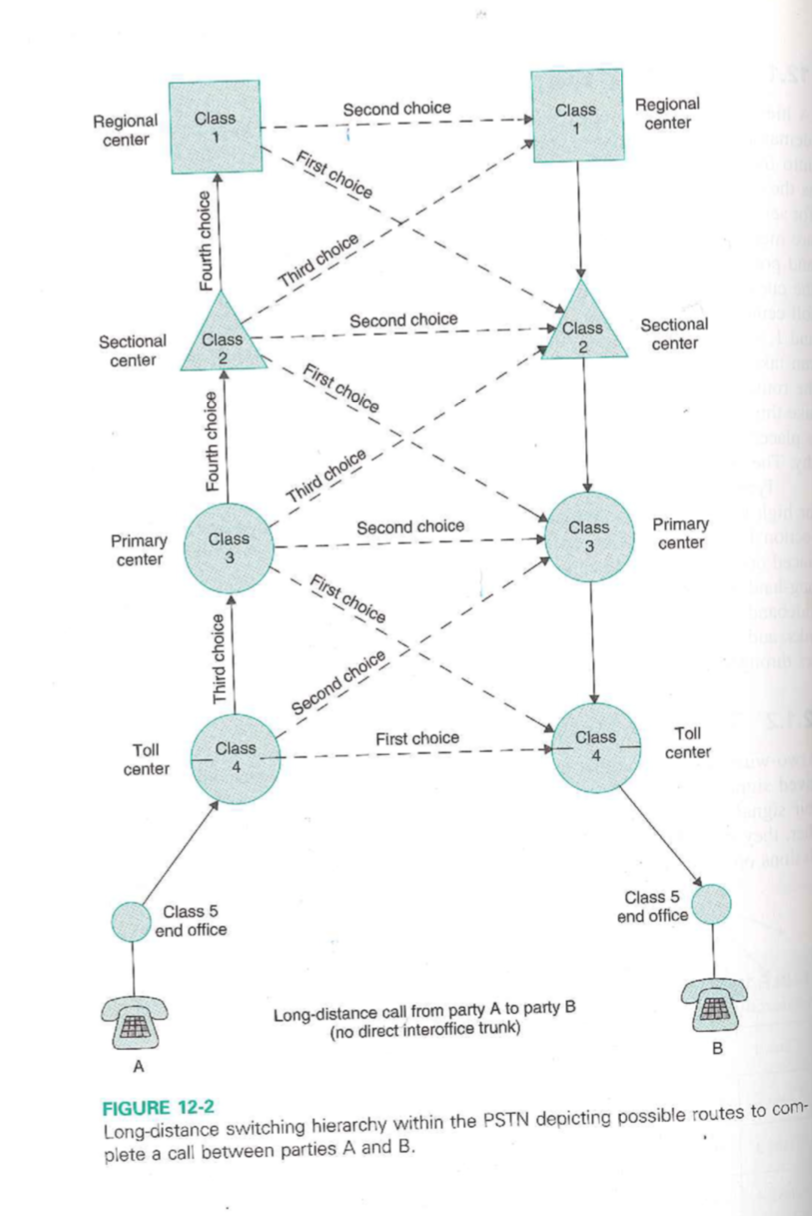

In [4]:
i(filename= "/Users/Chris/Desktop/Images/TCET35.png", width= 500, height= 500)

**Two-Wire versus Four-Wire Circuits**

* **Two-Wire**:
    $$\space$$
    * Transmitted and received signals share the same two lines (regardless of whether the line is private or switched). 
        * **When the two parties talk, their signals are superimposed onto each other. The can hear each other but they do not understand each other.** 
        $$\space$$
    * Intelligent voice transmissions on Two-Wire circuits can be considered half-duplex (allowing the transmission of signals in both directions but not simultaneously).
        * **This is a serious problem unless a modulation technique is used to seperate full-duplex (Refers to the transmission of data in two directions simultaneously) signals.**
        $$\space$$

    * Distance is also an issue. This overall depends on transmission medium specifically because two-wire circuits cannot produce the amount of energy necessary for bidirectional signal flow. 
        

* **Four-Wire**:
    $$\space$$
    * PSTN uses trunks; Trunks carry multiple telephone signals, and in certain cases several thousand. 
        * **Class 5 switching centers are usually connected with four-wire circuit for trunks** 
        $$\space$$
    * Four-wire circuits allows transmitted and received signals propagate over physically separate wires
        * **Allows the use of repeaters. Repeaters amplify and condition the signal for transmission over longer distances**
        $$\space$$

    * Four-wire circuits aren't always four wires. They could also be two physical wires with transmitted and received signals being partitioned into separate frequency bands. 
    
    
**Hybrids**

* Converts the two-wire "Subscriber Loop" Circuit to the four-wire circuit to the "Trunk Circuit". 


* Contains two separate amplifier circuits.
    * **The top amplifier circuit amplifies the signals traveling from West to East**
    * **The bottom amplifier circuit amplifies the signals traveling from East to West**
    * **The Hybrid Coil is a balanced, cross-coupled transformers with equivalent windings in each coil**
    * **Signals from the bottom and top amplifier cancels each other out**
    $$\space$$
    * **A balancing network is used to properly match the subscriber loop impedance to the hybrid impedance.**
        * Max power is transferred in the appropriate direction and no portion of the transmitted signal is returned to its source. 
        * The splitting of signal power causes 3-dB (Half-Power) Signal loss; The Amplifiers make up for the loss.

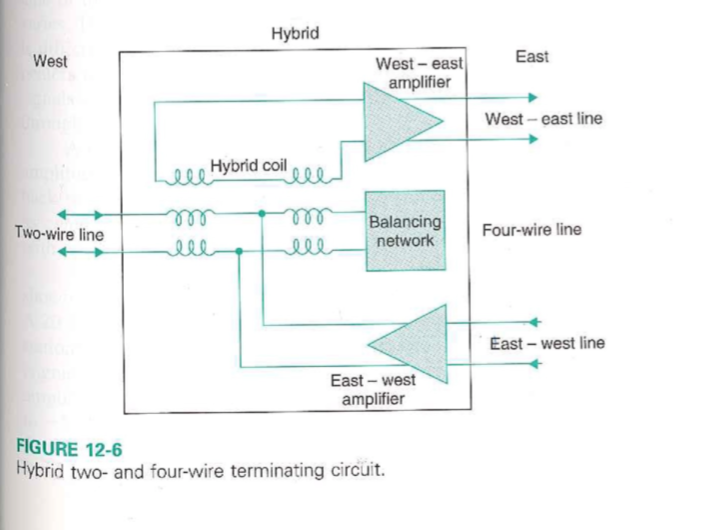

In [5]:
i(filename= '/Users/Chris/Desktop/Images/TCET37.png', width= 500, height= 500)

**Echo Suppressors and Echo Cancellers**

* Echo Suppressors are used to disable/eliminate echos that occur during phone conversations.


* Echos occur due mismatching impedances between the hybrid and the subscriber loop.
   * This causes east-west signals not canceling itself in the secondary of the hybrid coil (Due to heat, degradation of transmission mediums, etc).
   * East-west signals leave a residual which is returned to the West-east circuit.
   * An echo is produced. 
   
   
* For Shorter distances, echos aren't noticable and can act as a sidetone reinforcing the callers voice. 


* For longer distances, echos make phone conversations extremely difficult. If round-trip delay time exceeds 45 milliseconds an echo can be heard/echo suppressors are needed. 

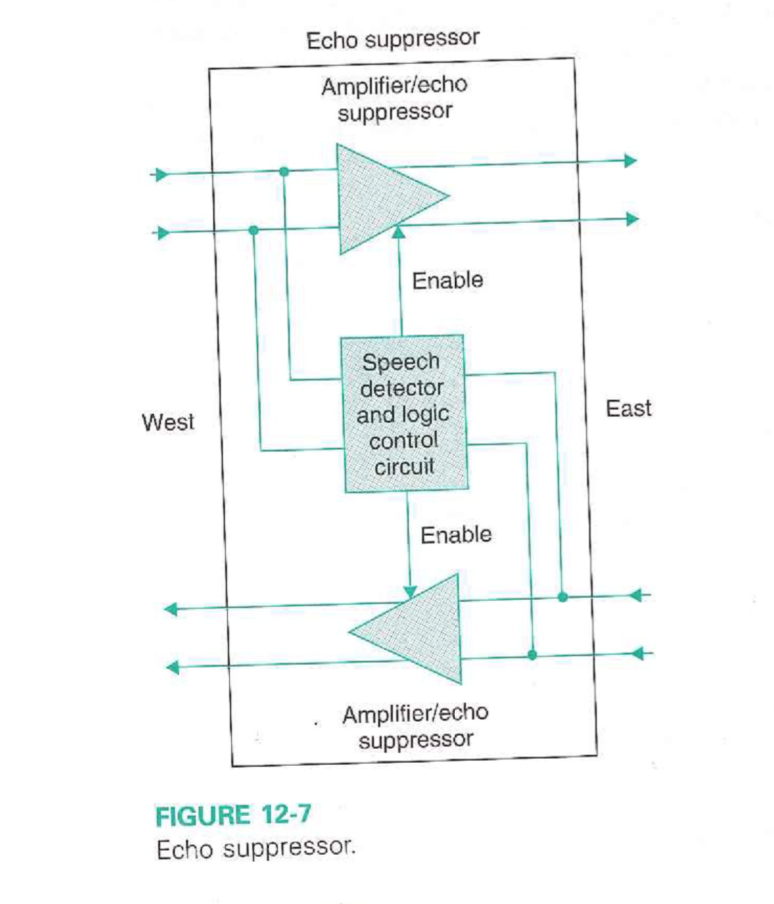

In [6]:
i(filename= '/Users/Chris/Desktop/Images/TCET38.png', width= 500, height= 500)

**Echo Suppressor Operation**

* "Two people conversing don't speak at the same time", echo suppressor operation relies on this principle.


* When a caller west speaks, east-west amplifier is shut off ensuring that the echo is suppressed. The same holds true for when the caller east speaks.


**Echo Suppressor Formula**

$$\text{If }\frac{2*\text{Distance Between 2 points}}{\text{Speed of Light}} > 45 \text{ milliseconds, then echo suppressors are needed}$$

In [60]:
def needEchoSuppressors(distance, speedoflight= 186000):
    """Returns True or False depending on of the result is greater than 45 milliseconds.
    Takes in the distance as a parameter. Speed of light is default and in miles/sec"""
    time = (2*distance)/speedoflight
    limit = 45 * m.pow(10,-3)
    if time > limit:
        return {'Time': [time], 'Needs Echo Suppressors': [True]}
    else:
        return {'Time': [time], 'Needs Echo Suppressors': [False]}

**Example:**

In [11]:
needEchoSuppressors(22300)

True

**Echo Cancellers**

* Echo Cancellers are employed where echo suppressors fail.
* Echo Suppressors are half-duplex so only one person can speak at the same time.
* Echo Cancellers alleviate that issue by being full-duplex. 
    * Echo Cancellers electrically subtract the return echo from the original signal.

**Analog Companding**

* **A compander is used to help stop smaller signals from being lost due to larger signals when these larger signals saturate the amplifiers during transmission. A compander has the following functions:**
    * Compresses a signal amplitude range before it is transmitted.
    * Expands a signal amplitude range back to its original condition when it's received.
    
    
* **The compander circuit contains logarithmic amplifiers with nonlinear transfer characteristics.**


* **United States uses the $\mu$-law for companding and this is shown below:**

$$v_o = \frac{\ln{(1 + \mu|v_i|)}}{\ln{(1 + \mu)}}, 0 \leq |v_i| \leq 1$$
$\ln = \text{ natural logarithm}$  
$v_o = \text{ output voltage}$  
$v_i = \text{ input voltage}$  
$\mu = \text{ mu, compression factor (typically 100 or 255 used in U.S. PSTN)}$

* **Europe uses the $A$-law for companding and this is shown below:**


$$v_o =
  \begin{cases}
    \mathbf{\frac{A|v_i|}{1 + \ln{(A)}}} & \quad 0 \leq |v_i| \leq \frac{1}{A}\\
    \mathbf{\frac{1 + \ln{(A|v_i|)}}{1 + \ln{(A)}}}  & \quad \frac{1}{A} \leq |v_i| \leq 1
  \end{cases}$$  
$\ln = \text{ natural logarithm}$  
$v_o = \text{ output voltage}$  
$v_i = \text{ input voltage}$  
$A = \text{ compression factor (ITU-TS recommendation: 87.6)}$


In [49]:
def compandingUSvoltage_out(compression_factor, voltage_in):
    if voltage_in >= 0 and voltage_in <= 1: 
        return m.log(1 + compression_factor*abs(voltage_in))/m.log(1 + compression_factor)
    else:
        return 0

def compandingEUvoltage_out(compression_factor, voltage_in):
    if voltage_in >= 0 and voltage_in <= (1/compression_factor):
        return (compression_factor*abs(voltage_in))/(1+m.log(compression_factor))
    elif voltage_in >= (1/compression_factor) and voltage_in <= 1:
        return (1 + m.log(compression_factor*abs(voltage_in)))/(1+m.log(compression_factor))
    else:
        return 0
    
lst1 = [x for x in range(0, 51)]
lst2 = [compandingEUvoltage_out(87.6, x/100) for x in lst1]
lst3 = [compandingUSvoltage_out(255, x/100) for x in lst1]
arr1 = np.array(lst1)
arr2 = np.array(lst2)
arr3 = np.array(lst3)
dta1 = {'Voltage IN': arr1, 'Voltage OUT (EU)': arr2, 'Voltage OUT (US)': arr3}
df1 = pd.DataFrame.from_dict(dta1)

In [53]:
df1.head(15)

,Voltage IN,Voltage OUT (EU),Voltage OUT (US)
0,0,0.000000,0.000000
1,1,0.160065,0.228477
2,2,0.285186,0.326101
3,3,0.359273,0.389088
4,4,0.411839,0.435678
5,5,0.452612,0.472670
6,6,0.485927,0.503350
7,7,0.514093,0.529562
8,8,0.538493,0.552442
9,9,0.560014,0.572744


In [54]:
df1.tail(15)

,Voltage IN,Voltage OUT (EU),Voltage OUT (US)
36,36,0.813321,0.817007
37,37,0.818328,0.821895
38,38,0.823201,0.826655
39,39,0.827947,0.831292
40,40,0.832573,0.835813
41,41,0.837085,0.840223
42,42,0.841488,0.844528
43,43,0.845788,0.848732
44,44,0.849988,0.852841
45,45,0.854095,0.856859


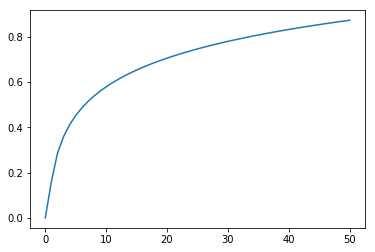

In [44]:
plt.plot(arr1, arr2)

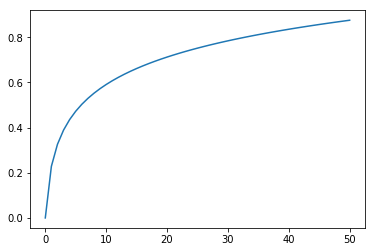

In [45]:
plt.plot(arr1, arr3)

**Transmission Media for Trunks**

* **There are several different transmission media to be used for trunks circuits:**
    * Fiber Optics
    * Coaxial
    * Twisted Pair
    * Satellite

**Open-Wire: Need to Knows**

* A relic of the past, might be used in some rural areas
* Usually hung up on telephone poles w/ glass insulation and the wires at least 1 foot apart (minimizes capacitance)
* It's made out of steel coated with copper (reason: weather conditions/withstand suspension weight)
* Distance of 50 km can be achieved before repeaters are necessary


* **Disadvantages:**
    * Ugly and Bulky
    * Severely affected by weather conditions
    * Affected by Cross Talk
    
**Twisted Pair Cables**

* Are copper wires that are bundled together and insulated to form a single cable (this is to try and prevent crosstalk)
* Wire gauge range: 19-26 gauge copper wire
* Because wires tend to be bundled together, the suffer more from crosstalk than open wire
* used in short-haul trunks
* repeaters are necessary after 3-4 miles (12 or 24 multiplex voices channels per twistede pair)


**Coaxial Cables**

* Coax cables are better than twisted pair cables.
* More useful for frequencies @ 1 Mhz and above.
* Made with copper shielding covering a dialectric used for insulation cover the copper conductive core.
* **$\uparrow$ This is useful as it protects against radiation loses and channel interference (virtually eliminates it.)**
* Expected to carry several thousands of channels

***Bell System L5 Coaxial Carrier***

* Contains 22 coaxial cables bounded in one: 10 for east-west, 10 for west-east, 2 for backup.
* Capacity of 108,000 voice channels (is 10 East/West, and vice-versa).
* Has a repeater every mile, and powerstations every 75 repeaters (or 75 miles/120 Km).

**Microwave Links**

* Can be used as a replacement for coaxial cables, specifically for high-capacity long-haul trunks.
* Capacity: Several thousand Voice Channels
* Disance between repeaters: 20-30 miles
* Repeater antennae are usually on rooftops, skyscrapers, ***tall objects***, etc.
* **$\uparrow$ Reason: so no objects are within the line of site transmission path.**
* Microwaves are expensive compared to coaxial, check ***advantages over coaxial*** to see why you should choose microwaves.


* **Advantages over Coaxial**
    * Fewer repeaters are necessary for amplifying signals
    * Distance between switching centers are shorter
    * Underground facilities are not necessary
    * Multiple channels can be transmitted over a single link
    * Minimal Delay Times
    * Minimal crosstalk
    * Fewer repeaters means less maintenance and increased reliability
    

**Submarine Cables**

* Submarine cables are coaxial cables made to withstand the elements from the ocean's floor
* Made with several layers of insulation and steel reinforcement to protect the conductor
* Repeaters are made in the same way to protect against damage

**Satellite Communications**

* The satellite is essentially a microwave relay station placed in orbital space.
* A huge microwave disk sends the signal up, a transponder receives the weak signal ( amplifies, and conditions the signal) and sends it back down to other earth station.

**Central Office Switching Systems**

* Switching at central offices is necessary to establish connection between 2 parties.
* We'll talk about common battery systems here which usually automates this process
* $\uparrow$ There are three types:
    * Step-by-step
    * Crossbar
    * Electronic Switching System
    
***Step-by-step Switching***

* Strowger Switch is a step-by-step switching system
* It performs switching in two dimensions: Vertically, Horizontal.

***Cross-Bar Switching***

* Better than the Strowger Switch
* Has crossbars that make/break contact (switching done by this process)
* Crossbar switches are electromagnetically activated

***Electromagnetic Switching System***

* Faster, better, capable of handling more subscribers vs. Cross-Bars and other electromagnetic switching systems.


* **No. 1 ESS:**
    * Made by Bell Systems 1965
    * Used Stored Program Control for the switching, signaling, administrative tasks.
    * Far superior to step-by-step and crossbar switching systems
    * 10000 to 70000 subscribers
    * Switching arrangement is made by 
    * **Switching:**
        * Seal Dried Reed Switches activated by a 300-$\mu$s current pulse.
        * Magnetic Material within the reed relay is called a *ferreed*
    $$\space$$
    * **ESS Memory:**
        * Two kinds of memory: Twister Memory, Ferrite Sheet Memory 
        * ***Twister Memory:***
            * Superpermanent
            * Stores Programs not likely to change, the Control Program
            * Considered ROM (Read-Only Memory)
            * Only someone with a special machine can rewrite the program
            * $\uparrow \rightarrow$ That means only read errors and power failures cannot alter the twister memory contents.
        * ***Ferrite Sheets***
            * For alter-able memory
            * Stores tmeporary data, considered read-write memory
            * $\uparrow \rightarrow$ Related to processing and the administration of the Call. 
            
***Electromagnetic Switching System Features***

* Call Forwarding: Transfers Calls automatically to where you can be reached
* Call Waiting: Allows you to switch back and forth between multiple callers
* Cancel Call Waiting: cancels call waiting
* Call Within: Allows you to use your home handsets as an intercom
* Speed Call: Allows you to program you phone to dial phone numbers with one or two buttons
* Three-way Calling: Speak to two people at once, three persons to one three-way call
* Return Call: Annouces the last number that called you
* Redial: Allows you to redial last number you called.
* Call Trace: Can Trace the last call made to you
* Caller ID: Allows you to screen your calls. Shows caller information if available
* Caller ID Block: Prevents your number from appearing on Caller ID when making a call.


## Practice Questions: Q.1-10

1. What type of trunks are used to interconnect the following:
    * Central Offices: **Interoffice Trunks**
    * Tandem Offices to Central Offices: **Tandem Trunk**
    * Central Offices to a Toll Center: **Toll Trunks**
    * Toll Center to Toll Center: **Intertoll Trunk**
    

2. How many classes of switching exchanges are used in North America, and what are their names. 
    * **End Office (Central Office): Level 5**
    * **Toll Center: Level 4**
    * **Primary Center: Level 3**
    * **Sectional Center: Level 2**
    * **Regional Center: Level 1**
    

3. Name 5 advantanges for private line over switched line
    * reduced crosstalk
    * reduced attenuation and phase delay distortion
    * high data transfer rate 
    * operates 24hrs
    
    
4. What's the name of the device (used in switching offices) that converts 2 wire subscriber loop to 4 wire circuit.
    * **The device is called a Hybrid**
    

5. Compute minimum round-trip delay for time for a signal to propogate between two telephones separated by 2900 miles. Assume speed of light. Would echo suppressors or echo cancelors be necessary.
    * **See Answer Below**
    
    
6. What is the of the process for compressing a signal at the transmitter and expanding it at the receiver.
    * **Companding**
   
   
7. What major parameter is improved as a result of the process in question 6>
    * **$\mu$ for US, $A$ for EU**
    
    
8. Name five transmission mediums used for trunk circuits.
    * **Coaxial**
    * **Open-Wire**
    * **Twisted Pair**
    * **Radio Waves**
    * **Satellite**
    * **Submarine** *


9. Explain what happens when a call is blocked.
    * **A special tone similar to to busy tone is used, it is faster, occurs during peak hours**.
    
  
10. Name four customer services that ESS provides:
    * **Caller ID**
    * **Three-way Calling**
    * **Call Waiting**
    * **Redial**

#### Q. 5 Answers 

* Time

In [66]:
needEchoSuppressors(2900)['Time'][0] * m.pow(10, 3)

31.18279569892473

* Do we need echo suppressors/cancellers?

In [68]:
needEchoSuppressors(2900)['Needs Echo Suppressors'][0]

False